In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, KFold, learning_curve, validation_curve, train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, roc_curve
%matplotlib inline

In [2]:
breast_cancer = load_breast_cancer()
X = breast_cancer["data"]
y = breast_cancer['target']

In [3]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
df = pd.DataFrame(X,columns=breast_cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [4]:
df['target'] = y
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Inverse Regularization Parameter

In [6]:
#Inverse regularization parameter - 
#A control variable that retains strength modification of Regularization 
#by being inversely positioned to the Lambda regulator.
result_list = []

for param in [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100,1000]:
    # Write your code here to calculate train_accuracy and test_accuracy for the current parameter value
    # ......

    clf = LogisticRegression(C=param,solver='liblinear').fit(X_train, y_train)

    # predict on train and test set
    y_train_predict = clf.predict(X_train)
    y_test_predict = clf.predict(X_test)


    # calculate train and test accuracy
    train_accuracy = accuracy_score(y_train, y_train_predict)
    test_accuracy = accuracy_score(y_test, y_test_predict)

    # add to result_list
    result_list.append((param, train_accuracy, test_accuracy))

result_df = pd.DataFrame(result_list, columns=["C", "train_accuracy", "test_accuracy"])

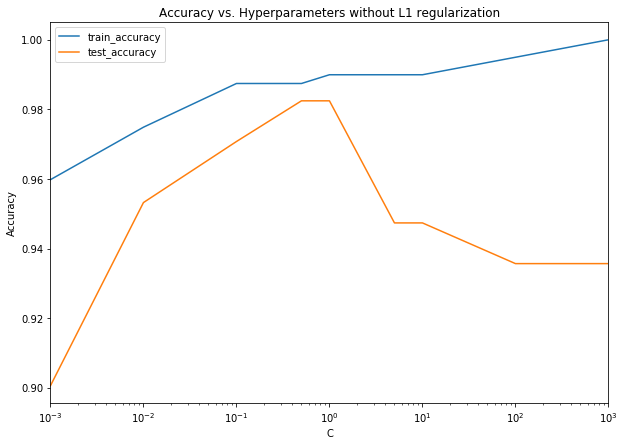

In [7]:
result_df.plot(x="C", y=["train_accuracy", "test_accuracy"], logx=True, figsize=(10,7))
plt.title('Accuracy vs. Hyperparameters without L1 regularization')
plt.style.use('fivethirtyeight')
plt.ylabel('Accuracy')
plt.show()

In [8]:
#Inverse regularization parameter - 
#A control variable that retains strength modification of Regularization 
#by being inversely positioned to the Lambda regulator.
result_list_l1 = []

for param in [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100,1000]:
    # Write your code here to calculate train_accuracy and test_accuracy for the current parameter value
    # ......

    clf = LogisticRegression(penalty='l1',C=param,solver='liblinear').fit(X_train, y_train)

    # predict on train and test set
    y_train_predict = clf.predict(X_train)
    y_test_predict = clf.predict(X_test)


    # calculate train and test accuracy
    train_accuracy = accuracy_score(y_train, y_train_predict)
    test_accuracy = accuracy_score(y_test, y_test_predict)

    # add to result_list
    result_list_l1.append((param, train_accuracy, test_accuracy))

result_df_l1 = pd.DataFrame(result_list_l1, columns=["C", "train_accuracy", "test_accuracy"])

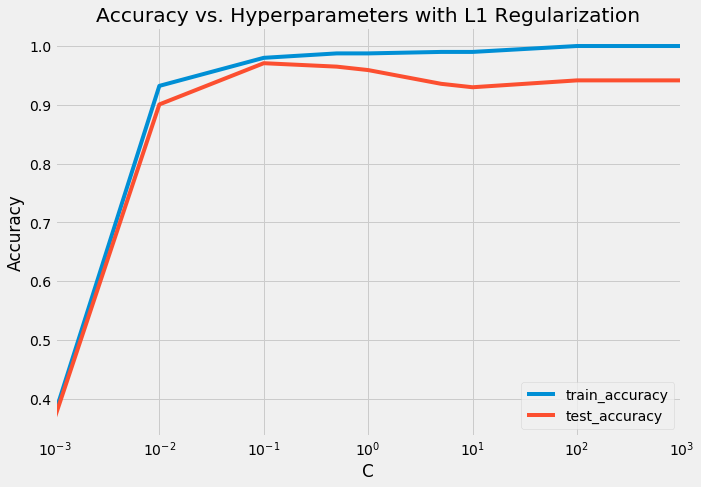

In [9]:
result_df_l1.plot(x="C", y=["train_accuracy", "test_accuracy"], logx=True, figsize=(10,7))
plt.title('Accuracy vs. Hyperparameters with L1 Regularization')
plt.style.use('fivethirtyeight')
plt.ylabel('Accuracy')
plt.show()

# Evaluation

In [10]:
lr = LogisticRegression(C=0.1,penalty='l1',solver='liblinear')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

**ROC**

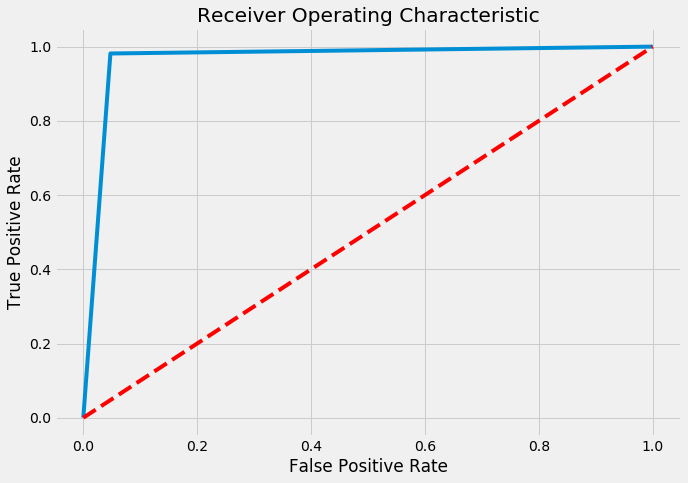

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('Receiver Operating Characteristic')
plt.style.use('fivethirtyeight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**Confusion Matrix and Heat Map**

In [12]:
cm = confusion_matrix(y_test, y_pred)

In [13]:
df_heat = pd.DataFrame(cm)
df_heat

,0,1
0,60,3
1,2,106


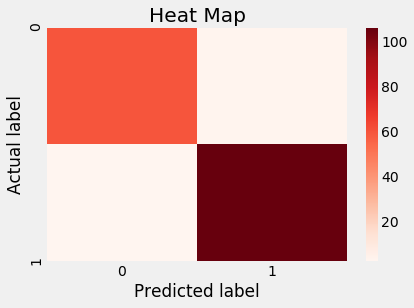

In [14]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(df_heat,cmap="Reds",fmt='g')

plt.title('Heat Map', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**Accuracy**

In [15]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
total = TN + FP + FN + TP
ACC = (TP + TN) / float(total)
ACC

0.9707602339181286

# Bias_Variance Trade-off

In [16]:
def bias_compute(y_pred, y_test):
    y_pred = np.array(y_pred)
    y_test = np.array(y_test)
    avg1 = np.mean(y_pred)
    avg2 = np.mean(y_test)
    return np.power((avg1 - avg2),2)

In [17]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [18]:
from sklearn.metrics import log_loss
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)
bias_list = []
var_list = []
total = []
C = [1e-4,1e-3,1e-2,1e-1,1,8,10,50,100,1000]
# C = np.linspace(0.001,100,50)

for c_ in C:    
    
        model = LogisticRegression(C=c_,penalty='l1',solver='liblinear')
        np_idx = 0
        variance=[]
        bias=[]
        loss=[]

        for train_idx, test_idx in kfold.split(X):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            X_train = scaler.fit_transform(X_train)
            X_test = scaler.fit_transform(X_test)

            model.fit(X_train, y_train)

            # X_test@model.coef_.reshape(-1) => X_test dot model.coef_
            # which calculates the values for Z. recall Z = sigma(x)
            # predicting the y_test
            pred=sigmoid(X_test@model.coef_.reshape(-1))
            # normally you'd filter them, but since we used cross entropy loss,
            # we will used the result from signoid as log_loss takes the probability of the predicted label
            # pred[pred>=0.5]=1
            # pred[pred<0.5]=0
            # print(pred)

            bias.append(bias_compute(pred,y_test))
            variance.append(np.sqrt(np.var(model.coef_))) 
            loss.append(log_loss(y_test,pred))
            
        bias_list.append(np.average(bias))
        var_list = np.append(var_list, np.average(variance))
        total.append(np.average(loss))


/Users/jianhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


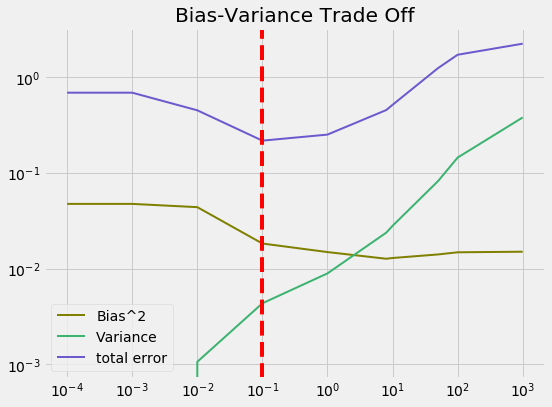

In [19]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
plt.plot(C, bias_list, color="olive",label="Bias^2",linewidth = 2)
#To better visualize variance(SE of coefs), we add a scaler .01 
plt.plot(C, var_list*0.01, color="mediumseagreen", label="Variance", linewidth = 2)
plt.plot(C, total, color="slateblue", linewidth = 2, label="total error")
plt.semilogx()
plt.yscale('log')
plt.legend(loc="best")
plt.title("Bias-Variance Trade Off")
plt.axvline(x=0.1,linestyle="--", color='red')
plt.show()

# Direct Optimization solution

(minimizing cost function subject to l1-regularization constraint)

In [20]:


# sigmoid/logistic function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Define cost function with Lasso regularizer
def costFunctionReg(theta, X, t ,C):
    """
    Take in numpy array of theta, X, and t to return the regularize cost function and gradient
    of a logistic regression
    Theta: weight
    X: features
    t: target
    C: hyperparameter tune
    """
    
    # define cost function with l1
    m=len(t)
    t=t[:,np.newaxis]
    
    predictions = sigmoid(X @ theta)
  
 #     error = (-t * np.log(predictions)) - ((1-t)*np.log(1-predictions))
    
    z=X @ theta
    error= t * np.logaddexp(0, -z) + (1-t) * np.logaddexp(0, z)
    
    
    cost = 1/m * sum(error)
    Cost_l1= C*cost + sum(abs(theta))
 
    # compute gradient
    j_0 = C* (X.T @(predictions - t))[0] # for bias
    j_1 = C*(X.T @ (predictions - t))[1:] + theta[1:]/abs(theta[1:])
    grad = np.vstack((j_0[np.newaxis,:],j_1))
    
  

    #grad=grad.reshape((-1,1)) # (31, 569)
    #print(np.shape(grad))
    return Cost_l1[0], grad
#Optimization method---gradient descent
def gradientDescent(X,t,theta,C,alpha,max_iters=1000):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(t)
    cost, grad = costFunctionReg(theta,X,t,C)
    cost_list=[cost]
    itr=0
     
    while (itr<max_iters ):
        theta = theta - (alpha * grad)
        cost, grad = costFunctionReg(theta,X,t,C)
        cost_list.append(cost)
        itr+=1
        
    return theta ,cost_list

# turn predicted value into binary predicitons
def threshold(y):
    return np.where(y<0.5,0,1)

# compute accuracy for binary predictions
def accuracy(y_pred,y_test):
    total=y_pred.shape[0]
    return 1-(np.sum(np.abs(y_pred-y_test))/total)

def logistic_fit(X_train, X_test, y_train, y_test,theta,C,alpha):
    theta,cost_list = gradientDescent(X_train,y_train,theta,C,alpha)
    y_pred_test=sigmoid(X_test@theta).reshape(-1)
    y_pred_binary_test=threshold(y_pred_test)
    acy_test=accuracy(y_pred_binary_test,y_test)
    
    y_pred_train=sigmoid(X_train@theta).reshape(-1)
  
    y_pred_binary=threshold(y_pred_train)

    acy_train=accuracy(y_pred_binary,y_train)
    
    
    return theta, cost_list, y_pred_binary_test,acy_test,acy_train



#  Bias_Variance Trade-off 

In [21]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def bias_compute(y_predictions, y_test):
    y_predictions = np.array(y_predictions)
    y_test = np.array(y_test)
    avg1 = np.average(y_test)
    avg2 = np.average(y_predictions)
    return np.power((avg1 - avg2),2)

In [22]:
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)
bias_list = []
var_list = []
total = []
C_list=[1e-4,1e-3,1e-2,1e-1,1,1e1,1e2]
#C_list=[1e-10,1e-5,1e-2,1e-1,1,1e1,1e2]

#C = [1e-10,1e-5,1e-2,1e-1,1,1e1,1e2,1e5]

for C in C_list:    
    
    np_idx = 0
    y_test_predictions=[]
    variance=[]
    bias=[]
    loss=[]
    y_true = []
    

    for train_idx, test_idx in kfold.split(X):

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        X_train = scaler.fit_transform(X_train)
        X_train=np.c_[np.ones((X_train.shape[0],1)),X_train]
        X_test = scaler.fit_transform(X_test)
        X_test=np.c_[np.ones((X_test.shape[0],1)),X_test]
        initial_theta = np.random.randn(X_train.shape[1], 1)
        theta,cost_list, predition_y,acy_test, acy_train= logistic_fit(X_train, X_test, y_train, y_test,initial_theta,C,0.01)

        preb=sigmoid(X_test@theta.reshape(-1))
        bias.append(bias_compute(preb,y_test))
        variance.append(np.sqrt(np.var(theta)))
        loss.append(log_loss(y_test,preb))
        
#         bias.append(bias_compute(predition_y,y_test))
#         variance.append(np.sqrt(np.var(theta))) 
#         MSE.append(log_loss(y_test,predition_y))
        
        

    bias_list = np.append(bias_list, np.average(bias))
    var_list = np.append(var_list, np.average(variance))
    total=np.append(total,np.average(loss))
    var_est=total-bias_list




/Users/jianhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/jianhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/jianhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/jianhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/jianhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/jianhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/jianhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/jianhuili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2:

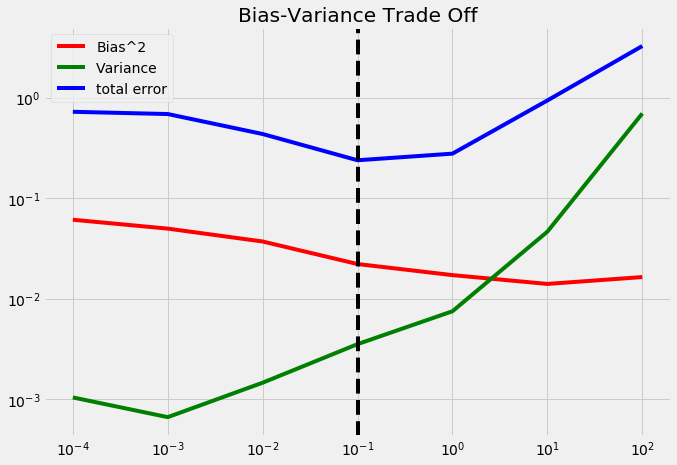

In [23]:
plt.figure(figsize=(10,7))
plt.plot(C_list, bias_list, color="r",label="Bias^2")
#To better visualize variance(SE of coefs), we add a scaler .01 
plt.plot(C_list, var_list*0.01, color="g", label="Variance")
plt.plot(C_list, total, color="b", label="total error")
plt.semilogx()
plt.yscale('log')
plt.legend(loc="best")
plt.title("Bias-Variance Trade Off")
plt.axvline(x=0.1,linestyle="--", color='black')
plt.show()